In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def plot_random_digit(data):
    i = int(random.random() * len(data))
    plt.imshow(data[i])

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

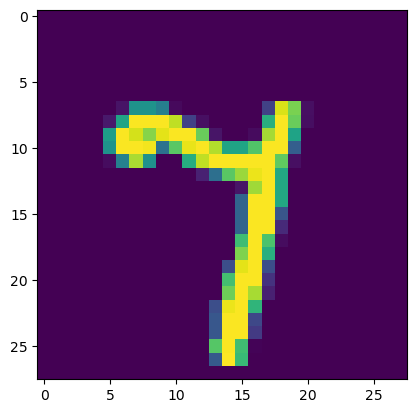

In [5]:
plot_random_digit(X_train)

In [6]:
X_train_flat = np.reshape(X_train, (-1, 28 * 28))
X_test_flat = np.reshape(X_test, (-1, 28 * 28))
X_train_flat.shape, X_test_flat.shape

((60000, 784), (10000, 784))

In [7]:
def plot_model(model, name):
    tf.keras.utils.plot_model(model, f"{name}.png", show_shapes=True, show_layer_names=True)
    img = plt.imread(f"{name}.png")
    plt.imshow(img)

In [8]:
def confusion_matrix(model, features, labels):
    y_pred = model.predict(features)
    y_pred = [row.argmax() for row in y_pred]
    mat = np.zeros((10, 10), dtype=int)
    for i in range(len(y_pred)):
        pred = y_pred[i]
        real = labels[i]
        mat[pred][real] += 1
    fig, ax = plt.subplots(figsize=(10, 9))
    sns.heatmap(mat, cmap='mako', annot=True, fmt='', ax=ax)

In [9]:
# basic model
model1 = tf.keras.Sequential([
    tf.keras.layers.Input((28 * 28)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model1.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5


2024-08-12 10:18:55.042583: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-08-12 10:18:55.042606: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-12 10:18:55.042611: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-12 10:18:55.042644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-12 10:18:55.042660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-08-12 10:18:55.369351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 15.4736 - accuracy: 0.7617
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 6.6746 - accuracy: 0.8431
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 6.0219 - accuracy: 0.8504
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 6.2560 - accuracy: 0.8548
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 6.4980 - accuracy: 0.8587


In [10]:
eval1 = model1.evaluate(X_test_flat, y_test)
eval1

 27/313 [=>............................] - ETA: 1s - loss: 7.0786 - accuracy: 0.8449

2024-08-12 10:19:37.682872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 6.0049 - accuracy: 0.8710


[6.004892826080322, 0.8709999918937683]

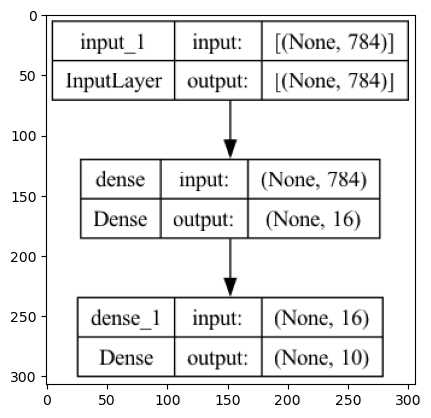

In [11]:
plot_model(model1, "model1")

 99/313 [========>.....................] - ETA: 0s

2024-08-12 10:19:39.349314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 1ms/step


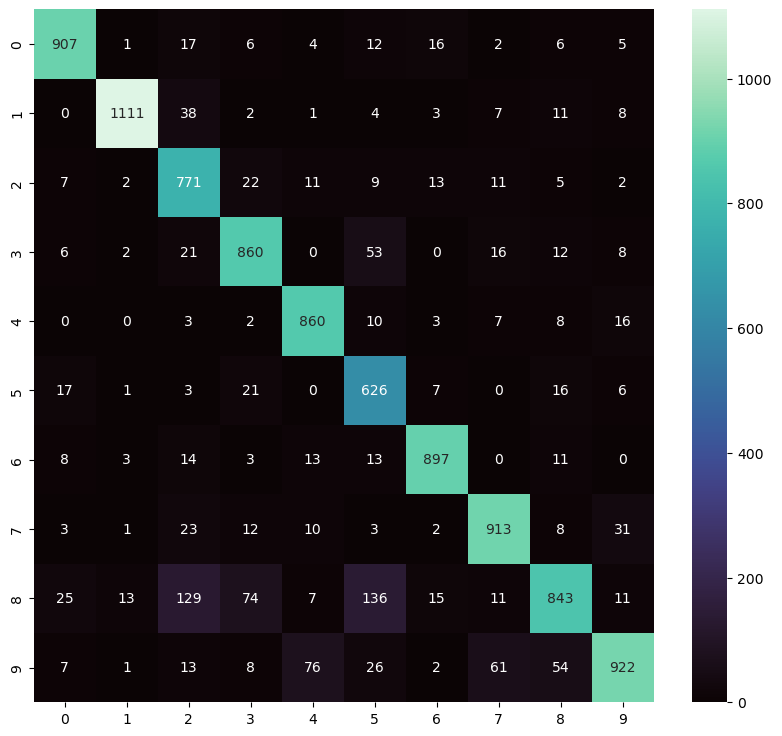

In [12]:
confusion_matrix(model1, X_test_flat, y_test)

In [13]:
# increasing hidden layer neurons
model2 = tf.keras.Sequential([
    tf.keras.layers.Input((28 * 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model2.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
  11/1875 [..............................] - ETA: 9s - loss: 131.5187 - accuracy: 0.2045  

2024-08-12 10:19:40.324453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 16.2509 - accuracy: 0.8371
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 18.7085 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 22.6447 - accuracy: 0.8666
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 26.8872 - accuracy: 0.8690
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 31.9267 - accuracy: 0.8699


In [14]:
eval2 = model2.evaluate(X_test_flat, y_test)
eval2

 27/313 [=>............................] - ETA: 1s - loss: 39.5693 - accuracy: 0.8669

2024-08-12 10:20:23.161502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 37.5185 - accuracy: 0.8756


[37.51846694946289, 0.8755999803543091]

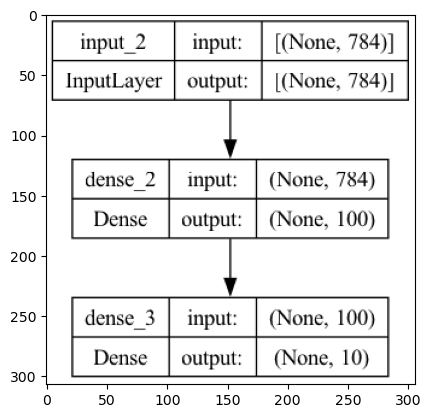

In [15]:
plot_model(model2, "model2")

106/313 [=========>....................] - ETA: 0s

2024-08-12 10:20:24.812701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


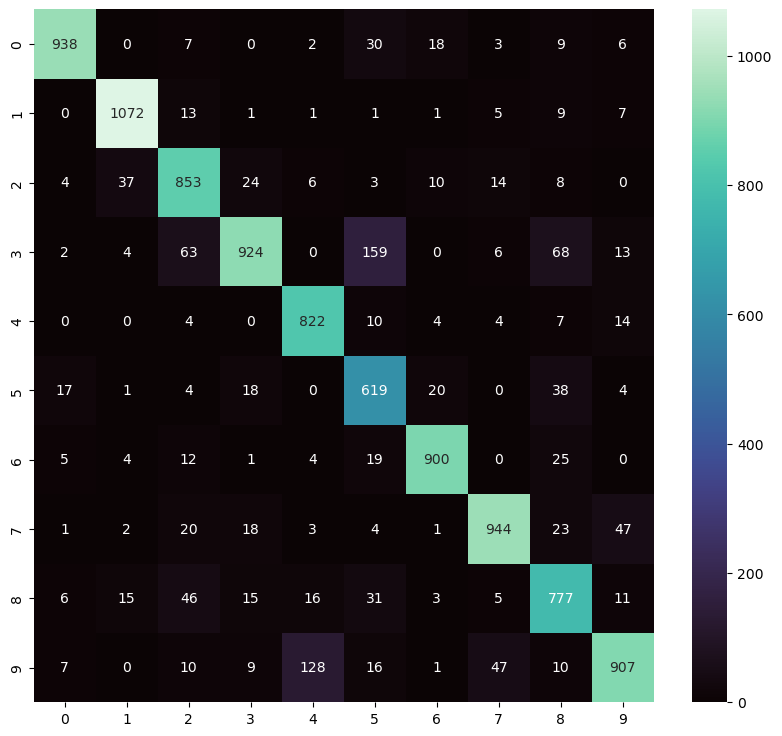

In [16]:
confusion_matrix(model2, X_test_flat, y_test)

In [17]:
# performing min max scaling on flattened features
X_train_flat_scaled = X_train_flat / 255
X_test_flat_scaled = X_test_flat / 255

In [18]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Input((28 * 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model3.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model3.fit(X_train_flat_scaled, y_train, epochs=5)

Epoch 1/5
  25/1875 [..............................] - ETA: 7s - loss: 1.6434 - accuracy: 0.4737

2024-08-12 10:20:25.955123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.3705 - accuracy: 0.8949
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3059 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3064 - accuracy: 0.9153
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3156 - accuracy: 0.9146
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3211 - accuracy: 0.9124


In [19]:
eval3 = model3.evaluate(X_test_flat_scaled, y_test)
eval3

 27/313 [=>............................] - ETA: 1s - loss: 0.3570 - accuracy: 0.9039

2024-08-12 10:21:06.498851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.9108


[0.33777567744255066, 0.9107999801635742]

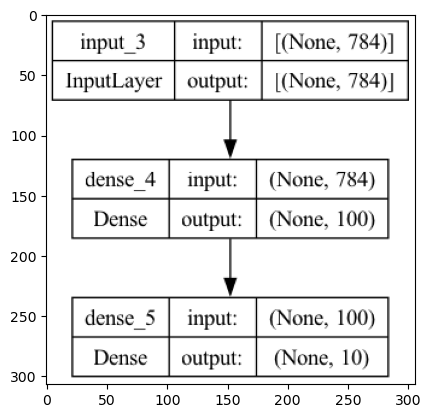

In [20]:
plot_model(model3, "model3")

104/313 [========>.....................] - ETA: 0s

2024-08-12 10:21:08.235105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


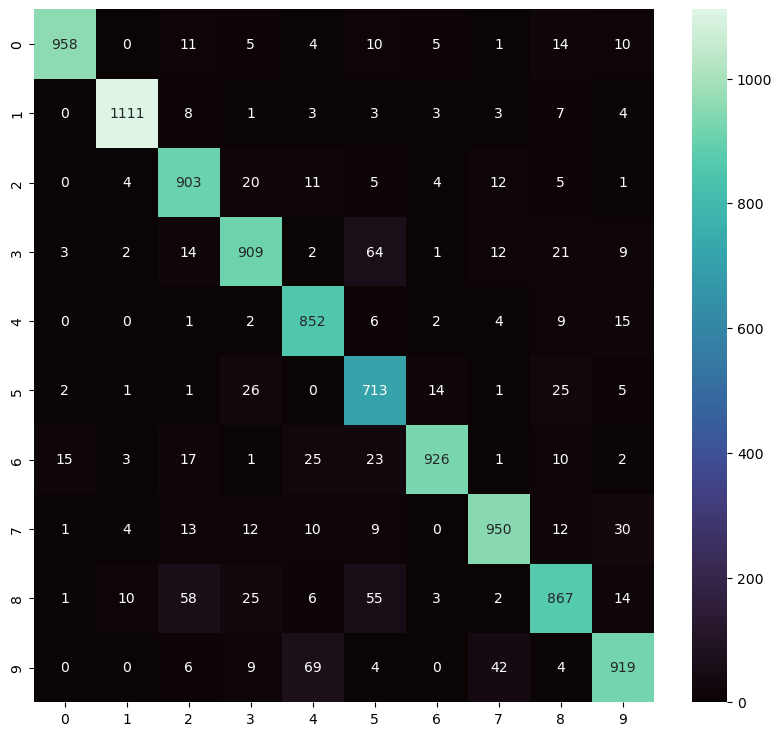

In [21]:
confusion_matrix(model3, X_test_flat_scaled, y_test)

In [22]:
# adding a second hidden layer
model4 = tf.keras.Sequential([
    tf.keras.layers.Input((28 * 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model4.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model4.fit(X_train_flat_scaled, y_train, epochs=5)

Epoch 1/5
  11/1875 [..............................] - ETA: 9s - loss: 2.1205 - accuracy: 0.3210  

2024-08-12 10:21:09.342876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4467 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1682 - accuracy: 0.8372
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.8924 - accuracy: 0.8110
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 4.9628 - accuracy: 0.8017
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 7.3553 - accuracy: 0.7952


In [23]:
eval4 = model4.evaluate(X_test_flat_scaled, y_test)
eval4

 27/313 [=>............................] - ETA: 1s - loss: 9.0717 - accuracy: 0.7801

2024-08-12 10:21:52.613944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 9.9131 - accuracy: 0.7836


[9.9131441116333, 0.7835999727249146]

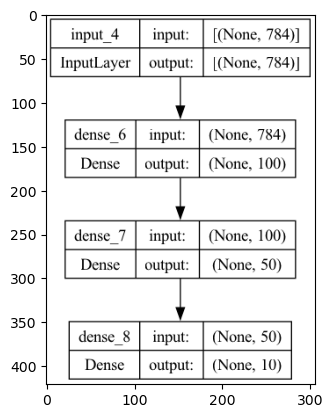

In [24]:
plot_model(model4, "model4")

 92/313 [=======>......................] - ETA: 0s

2024-08-12 10:21:54.409765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


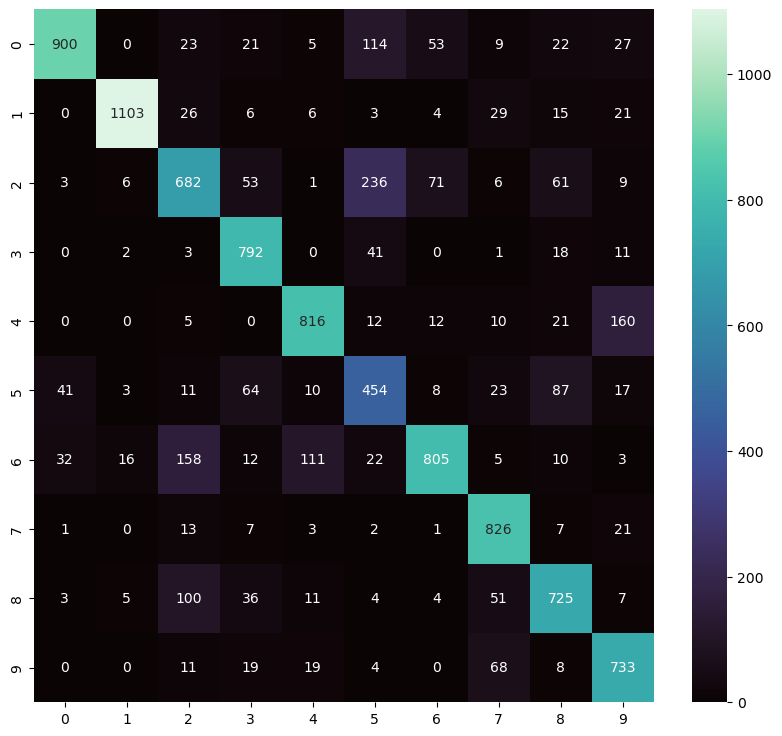

In [25]:
confusion_matrix(model4, X_test_flat_scaled, y_test)

In [26]:
# convolutional model
model5 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(48, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model5.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model5.fit(X_train, y_train, epochs=5)

Epoch 1/5
   1/1875 [..............................] - ETA: 9:12 - loss: 60.1470 - accuracy: 0.0625

2024-08-12 10:21:55.455475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.4987 - accuracy: 0.9385
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0781 - accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0612 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0465 - accuracy: 0.9857


In [27]:
eval5 = model5.evaluate(X_test, y_test)
eval5

 23/313 [=>............................] - ETA: 1s - loss: 0.0589 - accuracy: 0.9810

2024-08-12 10:22:54.965044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0615 - accuracy: 0.9823


[0.061480578035116196, 0.9822999835014343]

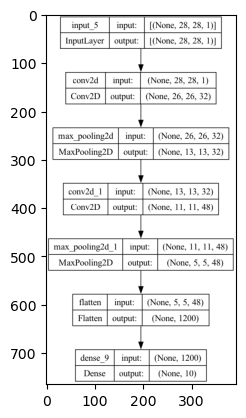

In [28]:
plot_model(model5, "model5")

 70/313 [=====>........................] - ETA: 0s

2024-08-12 10:22:56.774770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


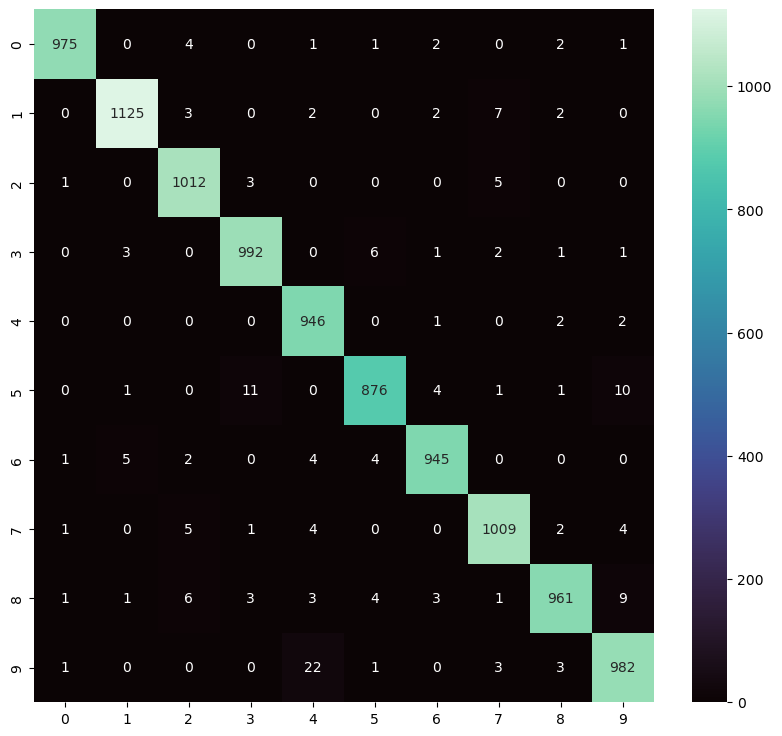

In [29]:
confusion_matrix(model5, X_test, y_test)

In [30]:
# adding dropout
model6 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(48, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model6.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model6.fit(X_train, y_train, epochs=5)

Epoch 1/5
   9/1875 [..............................] - ETA: 12s - loss: 34.9208 - accuracy: 0.1910 

2024-08-12 10:22:58.000522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5913 - accuracy: 0.9019
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1352 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1049 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0974 - accuracy: 0.9711
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0838 - accuracy: 0.9753


In [31]:
eval6 = model6.evaluate(X_test, y_test)
eval6

 20/313 [>.............................] - ETA: 1s - loss: 0.0389 - accuracy: 0.9891

2024-08-12 10:23:59.741291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0458 - accuracy: 0.9855


[0.045849524438381195, 0.9854999780654907]

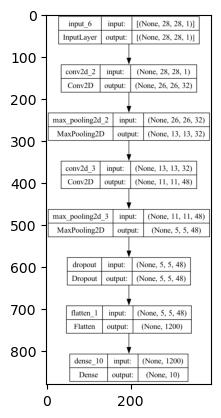

In [32]:
plot_model(model6, "model6")

 61/313 [====>.........................] - ETA: 0s

2024-08-12 10:24:01.726164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


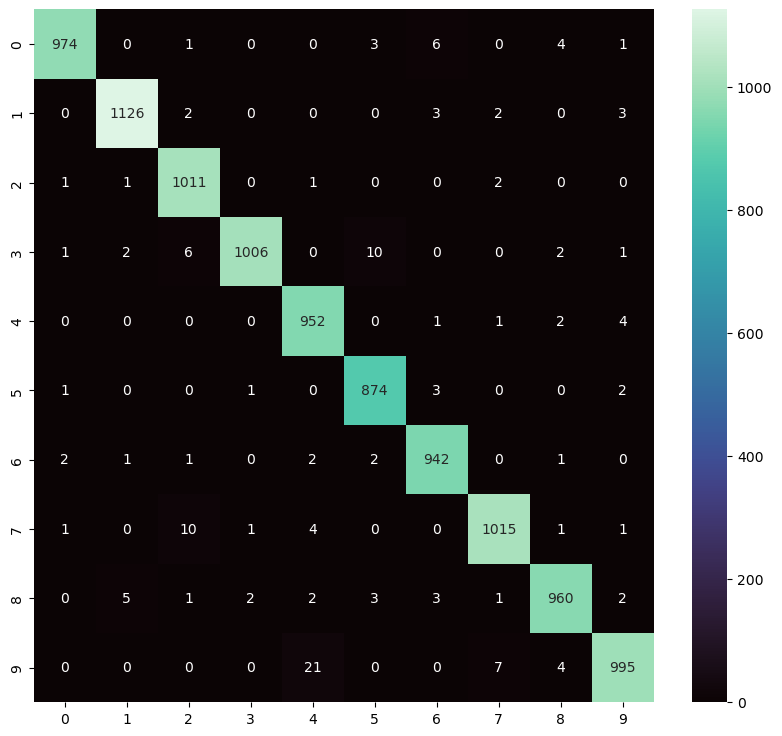

In [33]:
confusion_matrix(model6, X_test, y_test)

In [34]:
# adding hidden layer at end
model7 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(48, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model7.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model7.fit(X_train, y_train, epochs=5)

Epoch 1/5
   1/1875 [..............................] - ETA: 10:14 - loss: 55.0242 - accuracy: 0.1562

2024-08-12 10:24:02.919443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 2.0090 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 3.9775 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 21.7288 - accuracy: 0.9642
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 86.2608 - accuracy: 0.9681
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 195.8733 - accuracy: 0.9723


In [35]:
eval7 = model7.evaluate(X_test, y_test)
eval7

 23/313 [=>............................] - ETA: 1s - loss: 216.0293 - accuracy: 0.9742

2024-08-12 10:25:02.898976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 180.4032 - accuracy: 0.9822


[180.40316772460938, 0.982200026512146]

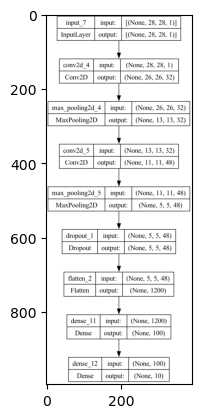

In [36]:
plot_model(model7, "model7")

 77/313 [======>.......................] - ETA: 0s

2024-08-12 10:25:04.761778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


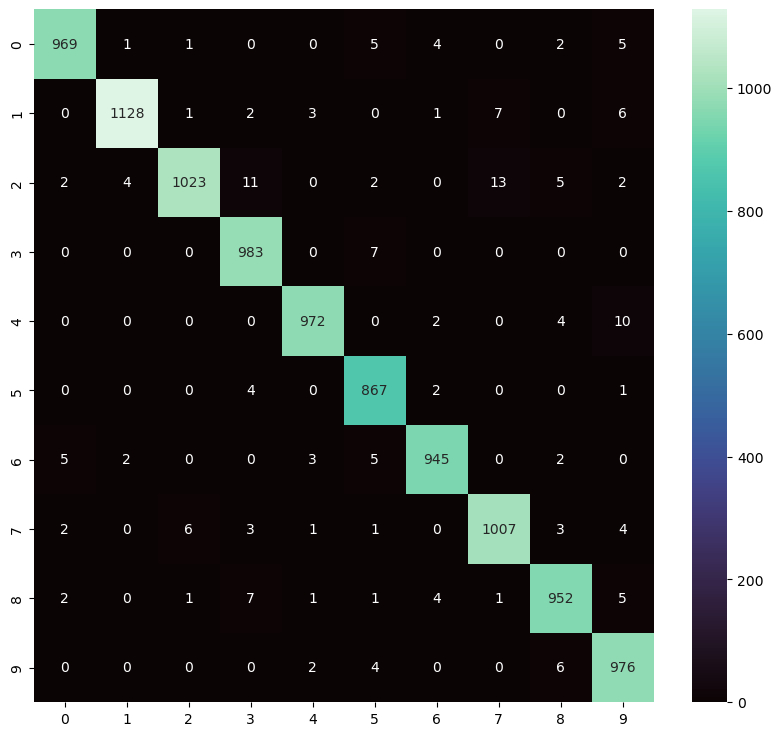

In [37]:
confusion_matrix(model7, X_test, y_test)

In [38]:
# adding double conv, max pool
model8 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28, 1)),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(48, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model8.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model8.fit(X_train, y_train, epochs=5)

Epoch 1/5


2024-08-12 10:25:05.944338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.4579 - accuracy: 0.9171
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 13.2987 - accuracy: 0.9457
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 801.3044 - accuracy: 0.9615
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 18877.1504 - accuracy: 0.9663
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 148948.5469 - accuracy: 0.9689


In [39]:
eval8 = model8.evaluate(X_test, y_test)
eval8

 21/313 [=>............................] - ETA: 1s - loss: 341700.5312 - accuracy: 0.9717

2024-08-12 10:26:38.911375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 279996.5000 - accuracy: 0.9691


[279996.5, 0.9690999984741211]

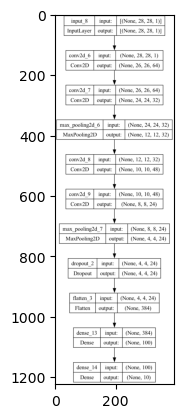

In [40]:
plot_model(model8, "model8")

 67/313 [=====>........................] - ETA: 0s

2024-08-12 10:26:40.843002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


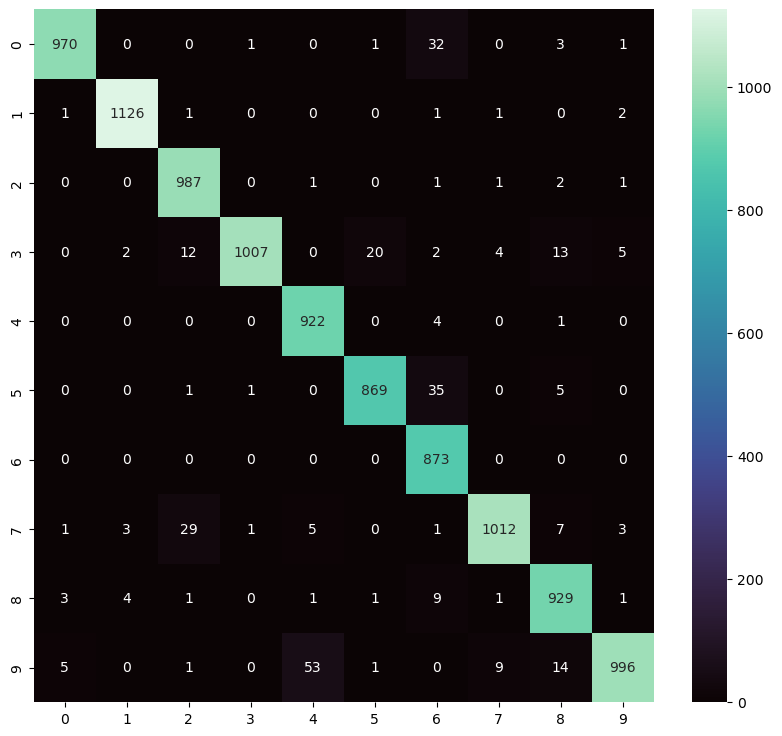

In [41]:
confusion_matrix(model8, X_test, y_test)

In [48]:
evals = [eval1, eval2, eval3, eval4, eval5, eval6, eval7, eval8]
accuracies = [eval[1] - 0.75 for eval in evals]
model_labels = [f'Model {i+1}' for i in range(len(evals))]

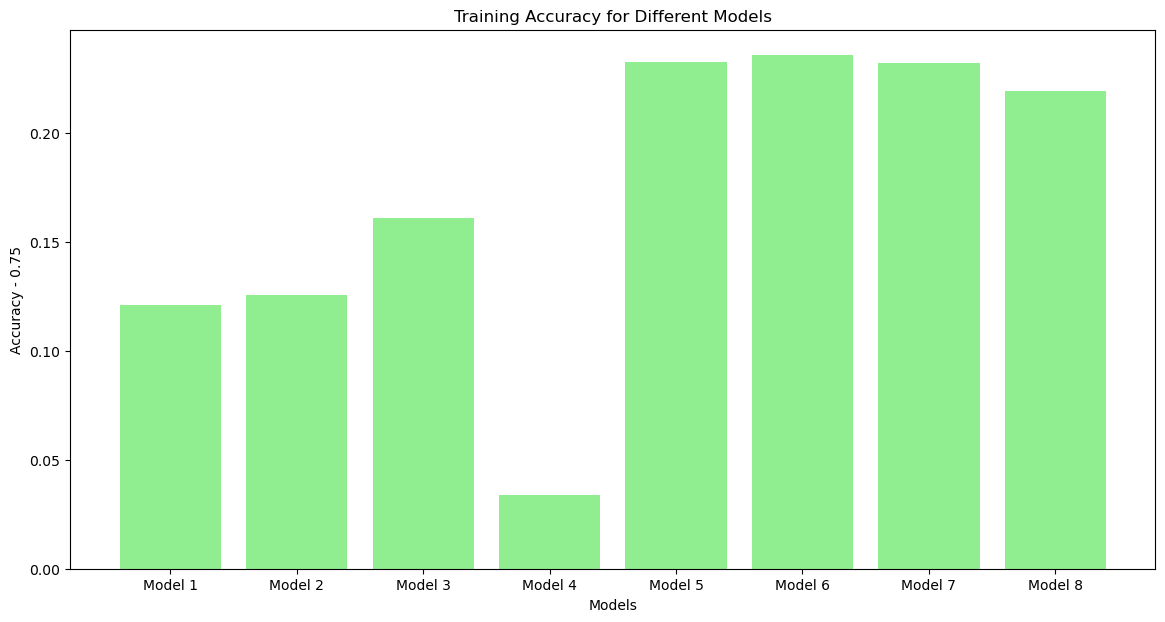

In [50]:
plt.figure(figsize=(14, 7))
plt.bar(model_labels, accuracies, color='lightgreen')
plt.title('Training Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy - 0.75')
plt.show()